Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\HP\DS_LAB_3\income.csv')

Exploring the dataset

In [3]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [4]:
df.shape

(31978, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


Selecting the relevant features from the DataFrame

In [7]:
feat=[df['age'],df['hoursperweek']]

In [8]:
df=pd.DataFrame(feat)

In [9]:
df=df.T

In [10]:
df=df.iloc[::1000,:]
df

,age,hoursperweek
0,45,28
1000,46,40
2000,21,40
3000,40,52
4000,35,60
5000,21,40
6000,26,50
7000,40,40
8000,40,40
9000,22,55


Visualizing the data points by a scatter plot

Text(0.5, 1.0, 'Scatter Plot')

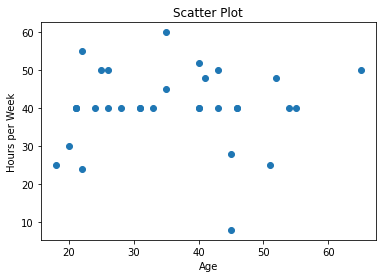

In [11]:
plt.scatter(df['age'],df['hoursperweek'])
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.title('Scatter Plot')

Importing K means with number of cluster = 3 

Fitting the model with train data and predicting the cluster for each data point

In [13]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
Y_pred = km.fit_predict(df)
Y_pred

array([0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 0])

Appending 'cluster' column to the dataframe

In [14]:
df['cluster'] = Y_pred
df.head()

,age,hoursperweek,cluster
0,45,28,0
1000,46,40,1
2000,21,40,2
3000,40,52,1
4000,35,60,1


Finding the centroids of the clusters

In [15]:
km.cluster_centers_

array([[47.        , 20.33333333],
       [45.35714286, 45.21428571],
       [24.6       , 39.6       ]])

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
print(df1.shape)
print(df2.shape)
print(df3.shape)

(3, 3)
(14, 3)
(15, 3)


Visualizing the data points in 3 clusters with their centroids

Text(0, 0.5, 'Hours per week')

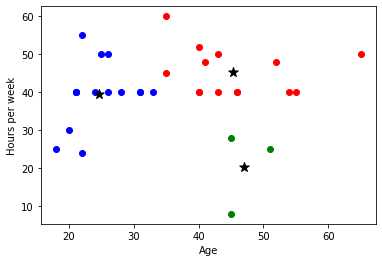

In [17]:
plt.scatter(df1.age,df1.hoursperweek,color='g')
plt.scatter(df2.age,df2.hoursperweek,color='r')
plt.scatter(df3.age,df3.hoursperweek,color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Hours per week')

Using Elbow's method to find optimal value of k

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'SSE')

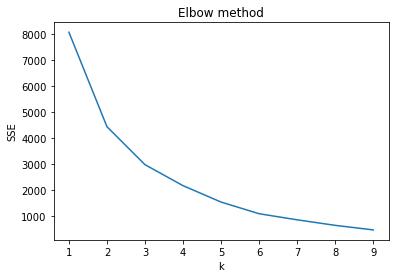

In [18]:
sse=[]
krange = range(1,10)
for k in krange:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

plt.plot(krange,sse)
plt.title('Elbow method')
plt.xlabel('k')
plt.ylabel('SSE')

Importing K means with number of cluster = 6

Fitting the model with train data and predicting the cluster for each data point

In [24]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
Y_pred = km.fit_predict(df)
Y_pred

array([2, 1, 0, 1, 5, 0, 5, 1, 1, 5, 4, 1, 1, 0, 1, 1, 2, 3, 3, 4, 4, 5,
       0, 4, 0, 0, 0, 1, 0, 3, 0, 2])

Appending 'cluster' column to the dataframe

In [25]:
df['cluster'] = Y_pred
df.head()

,age,hoursperweek,cluster
0,45,28,2
1000,46,40,1
2000,21,40,0
3000,40,52,1
4000,35,60,5


Finding the centroids of the clusters

In [26]:
km.cluster_centers_

array([[26.22222222, 40.        ,  1.        ],
       [41.55555556, 43.88888889,  2.77777778],
       [47.        , 20.33333333,  0.        ],
       [20.        , 26.33333333,  2.        ],
       [56.5       , 44.5       ,  3.        ],
       [27.        , 53.75      ,  1.        ]])

In [27]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]

Visualizing the data points in 6 clusters with their centroids

Text(0, 0.5, 'Hours per week')

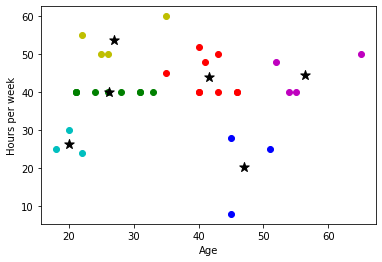

In [28]:
plt.scatter(df1.age,df1.hoursperweek,color='g')
plt.scatter(df2.age,df2.hoursperweek,color='r')
plt.scatter(df3.age,df3.hoursperweek,color='b')
plt.scatter(df4.age,df4.hoursperweek,color='c')
plt.scatter(df5.age,df5.hoursperweek,color='m')
plt.scatter(df6.age,df6.hoursperweek,color='y')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,color='k',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Hours per week')

Confusion matrix and Classification Report to check the accuracy of the model

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report')
print(classification_report(df['cluster'],km.labels_))
print('Confusion Matrix')
print(confusion_matrix(df['cluster'],km.labels_))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix
[[9 0 0 0 0 0]
 [0 9 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 4]]
